
 Monty Hall Problem Simulation

"Don't Switch"
 
                           Wins =  3366 
               Number of Trials =  10000 
    Observed Winning Proportion =  0.3366 
 Theoretical Winning Proportion =  0.3333333 

"Switch to Other Door"
 
                           Wins =  6634 
               Number of Trials =  10000 
    Observed Winning Proportion =  0.6634 
 Theoretical Winning Proportion =  0.6666667

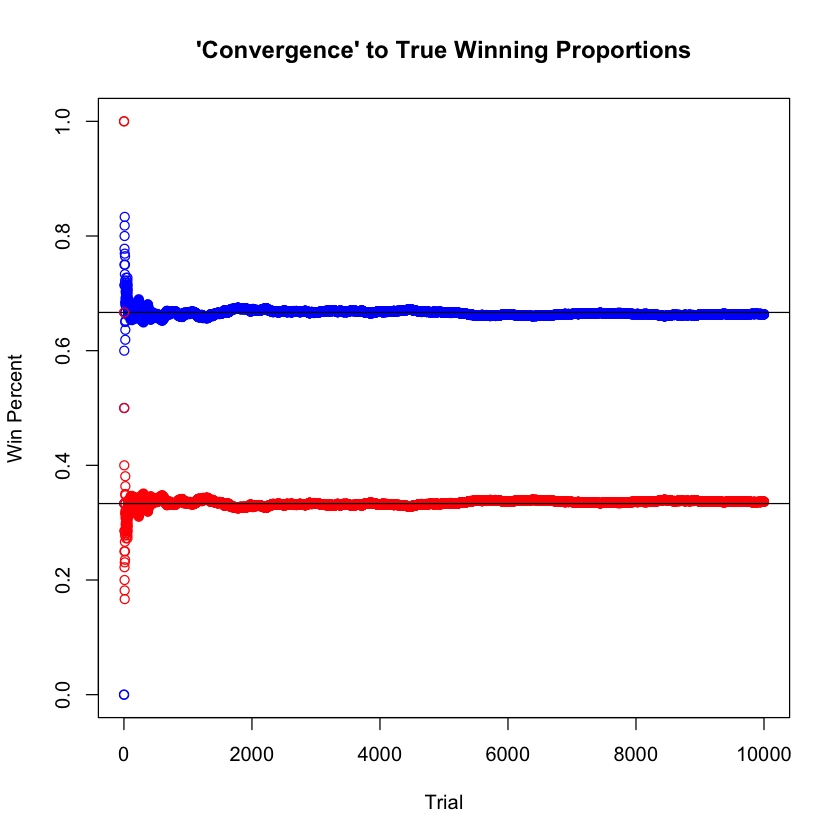

In [2]:
################################################
## Implementation of the Monty Hall Problem in R


## Number of simulations
N <- 10000

## Randomly select the doors which have the prize behind it
prize <- sample(1:3, N, replace = TRUE)

## Randomly select the contestant's door choice
stay <- sample(1:3, N, replace = TRUE)


reveal <- rep(0, N)
change <- rep(0, N)

for(i in 1:N) {
  x <- c(1:3)[-c(prize[i], stay[i])]
  
  ## If contestant chose wrong door, then only one possible door to reveal
  ## If contestant already chose the correct door, then two possible doors to reveal
  ## If so, choose randomly which door to reveal
  reveal[i] <- x[sample.int(length(x), size = 1)]

  ## This changes from the original choice to the other door not revealed
  change[i] <- c(1:3)[-c(reveal[i], stay[i])]
}

## Number of wins for changing or staying with initial door respectively
changewin <- ifelse(change == prize, 1, 0)
staywin <- ifelse(stay == prize, 1, 0)

## Proportion of wins
change_perc <- mean(changewin)
stay_perc <- mean(staywin)

## To display the results nicely
d1 <- "\n Monty Hall Problem Simulation\n\n\"Don't Switch\"\n"
d2 <- "\n                           Wins = "
d3 <- "\n               Number of Trials = "
d4 <- "\n    Observed Winning Proportion = "
d5 <- "\n Theoretical Winning Proportion = "
d6 <- "\n\n\"Switch to Other Door\"\n"

cat(d1, d2, sum(staywin), d3, N, d4, stay_perc, d5, 1/3, d6,
    d2, sum(changewin), d3, N, d4, change_perc, d5, 2/3)

## Plot 'convergence' to true winning proportions
## Blue is switching doors, red is staying
plot.new()
plot(cumsum(changewin) / c(1:N), main = "'Convergence' to True Winning Proportions",
     xlab = "Trial", ylab = "Win Percent", ylim = c(0, 1), col = "blue")
abline(h = 2/3)
points(cumsum(staywin) / c(1:N), type = "p", col = "red")
abline(h = 1/3)


# Ein Kommentar